In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2

In [2]:
df = pd.read_csv('Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
df1 = df.dropna(subset=['Arrival Delay in Minutes'])

In [7]:
df1.shape

(129487, 23)

<AxesSubplot: ylabel='satisfaction'>

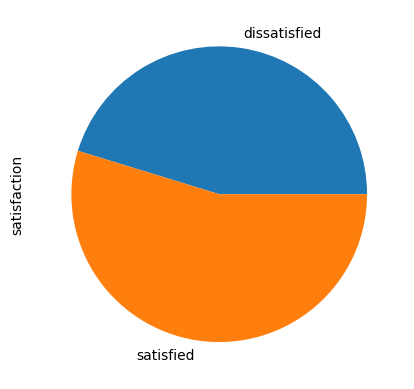

In [11]:
df1.groupby('satisfaction')['satisfaction'].count().plot(kind='pie')

Gender

In [9]:
df1.Gender.value_counts()

Female    65703
Male      63784
Name: Gender, dtype: int64

In [10]:
df1.Gender = df1.Gender.map({'Male': 0, 'Female': 1})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  int64  
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

C:\Users\shara\AppData\Local\Temp\ipykernel_19804\2114406879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Gender = df1.Gender.map({'Male': 0, 'Female': 1})


Satisfaction

In [12]:
df1.satisfaction = df1.satisfaction.map({'satisfied':1,'dissatisfied':0})

C:\Users\shara\AppData\Local\Temp\ipykernel_19804\1111539444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.satisfaction = df1.satisfaction.map({'satisfied':1,'dissatisfied':0})


In [13]:
df1.satisfaction.value_counts()

1    70882
0    58605
Name: satisfaction, dtype: int64

In [15]:
df1.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0


Customer Type

In [16]:
df1['Customer Type'].value_counts()

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

In [17]:
df1['Customer Type'] = df1['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})

C:\Users\shara\AppData\Local\Temp\ipykernel_19804\419531478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Customer Type'] = df1['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})


In [18]:
df1['Customer Type'].value_counts()

1    105773
0     23714
Name: Customer Type, dtype: int64

Type of Travel

In [19]:
df1['Type of Travel'].value_counts()

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64

In [20]:
df1['Type of Travel'] = df1['Type of Travel'].map({'Business travel':1,'Personal Travel':0})

C:\Users\shara\AppData\Local\Temp\ipykernel_19804\1041978778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Type of Travel'] = df1['Type of Travel'].map({'Business travel':1,'Personal Travel':0})


In [21]:
df1['Type of Travel'].value_counts()

1    89445
0    40042
Name: Type of Travel, dtype: int64

Class 0-2:1 and 3-5:1

In [22]:
df1.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,1,65,0,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,1,47,0,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0


In [23]:
df1.Class.value_counts()

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64

In [26]:
df1 = pd.get_dummies(df1,columns=['Class'],drop_first=True)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Gender                             129487 non-null  int64  
 2   Customer Type                      129487 non-null  int64  
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  int64  
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

Range

In [28]:
df1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus
0,1,1,1,65,0,265,0,0,0,2,...,3,0,3,5,3,2,0,0.0,1,0
1,1,0,1,47,0,2464,0,0,0,3,...,4,4,4,2,3,2,310,305.0,0,0
2,1,1,1,15,0,2138,0,0,0,3,...,3,3,4,4,4,2,0,0.0,1,0
3,1,1,1,60,0,623,0,0,0,3,...,1,0,1,4,1,3,0,0.0,1,0
4,1,1,1,70,0,354,0,0,0,3,...,2,0,2,4,2,5,0,0.0,1,0


In [29]:
df1['Seat comfort'].value_counts()

3    29096
2    28645
4    28315
1    20882
5    17768
0     4781
Name: Seat comfort, dtype: int64

In [34]:
df1['Seat comfort'] = df1['Seat comfort'].map({0:0,1:0,2:0,3:1,4:1,5:1})

In [35]:
df1['Seat comfort'].value_counts()

1    75179
0    54308
Name: Seat comfort, dtype: int64

In [36]:
df1['Food and drink'].value_counts()

3    28065
4    27129
2    27078
1    21008
5    20285
0     5922
Name: Food and drink, dtype: int64

In [37]:
df1['Food and drink'] = df1['Food and drink'].map({0:0,1:0,2:0,3:1,4:1,5:1})

In [38]:
df1['Food and drink'].value_counts()

1    75479
0    54008
Name: Food and drink, dtype: int64

In [39]:
df1['Departure/Arrival time convenient'].value_counts()

4    29504
5    26723
3    23110
2    22735
1    20771
0     6644
Name: Departure/Arrival time convenient, dtype: int64

In [40]:
df1['Departure/Arrival time convenient'] = df1['Departure/Arrival time convenient'].map({0:0,1:0,2:0,3:1,4:1,5:1})

In [41]:
df1['Departure/Arrival time convenient'].value_counts()

1    79337
0    50150
Name: Departure/Arrival time convenient, dtype: int64

In [42]:
df1['Gate location'].value_counts()

3    33451
4    29997
2    24441
1    22497
5    19099
0        2
Name: Gate location, dtype: int64

In [43]:
df1['Gate location'] = df1['Gate location'].map({0:0,1:0,2:0,3:1,4:1,5:1})

In [44]:
df1['Gate location'].value_counts()

1    82547
0    46940
Name: Gate location, dtype: int64

In [45]:
df1['Inflight wifi service'].value_counts()

4    31474
5    28738
3    27518
2    26957
1    14670
0      130
Name: Inflight wifi service, dtype: int64

In [46]:
df1['Inflight wifi service'] = df1['Inflight wifi service'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['Inflight wifi service'].value_counts()

1    87730
0    41757
Name: Inflight wifi service, dtype: int64

In [47]:
df1['Inflight entertainment'].value_counts()

4    41752
5    29748
3    24133
2    19118
1    11768
0     2968
Name: Inflight entertainment, dtype: int64

In [48]:
df1['Inflight entertainment'] = df1['Inflight entertainment'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['Inflight entertainment'].value_counts()

1    95633
0    33854
Name: Inflight entertainment, dtype: int64

In [49]:
df1['Online support'].value_counts()

4    41406
5    35451
3    21543
2    17196
1    13890
0        1
Name: Online support, dtype: int64

In [50]:
df1['Online support'] = df1['Online support'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['Online support'].value_counts()

1    98400
0    31087
Name: Online support, dtype: int64

In [51]:
df1['Ease of Online booking'].value_counts()

4    39807
5    34034
3    22344
2    19887
1    13397
0       18
Name: Ease of Online booking, dtype: int64

In [52]:
df1['Ease of Online booking'] = df1['Ease of Online booking'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['Ease of Online booking'].value_counts()

1    96185
0    33302
Name: Ease of Online booking, dtype: int64

In [53]:
df1['On-board service'].value_counts()

4    40558
5    31625
3    26959
2    17117
1    13223
0        5
Name: On-board service, dtype: int64

In [54]:
df1['On-board service'] = df1['On-board service'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['On-board service'].value_counts()

1    99142
0    30345
Name: On-board service, dtype: int64

In [55]:
df1['Leg room service'].value_counts()

4    39583
5    34284
3    22397
2    21683
1    11098
0      442
Name: Leg room service, dtype: int64

In [56]:
df1['Leg room service'] = df1['Leg room service'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['Leg room service'].value_counts()

1    96264
0    33223
Name: Leg room service, dtype: int64

In [57]:
df1['Baggage handling'].value_counts()

4    48107
5    35623
3    24413
2    13388
1     7956
Name: Baggage handling, dtype: int64

In [58]:
df1['Baggage handling'] = df1['Baggage handling'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['Baggage handling'].value_counts()

1    108143
0     21344
Name: Baggage handling, dtype: int64

In [59]:
df1['Checkin service'].value_counts()

4    36372
3    35430
5    26919
2    15443
1    15322
0        1
Name: Checkin service, dtype: int64

In [60]:
df1['Checkin service'] = df1['Checkin service'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['Checkin service'].value_counts()

1    98721
0    30766
Name: Checkin service, dtype: int64

In [61]:
df1['Cleanliness'].value_counts()

4    48665
5    35803
3    23907
2    13361
1     7746
0        5
Name: Cleanliness, dtype: int64

In [62]:
df1['Cleanliness'] = df1['Cleanliness'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['Cleanliness'].value_counts()

1    108375
0     21112
Name: Cleanliness, dtype: int64

In [63]:
df1['Online boarding'].value_counts()

4    35079
3    30692
5    29875
2    18517
1    15310
0       14
Name: Online boarding, dtype: int64

In [64]:
df1['Online boarding'] = df1['Online boarding'].map({0:0,1:0,2:0,3:1,4:1,5:1})
df1['Online boarding'].value_counts()

1    95646
0    33841
Name: Online boarding, dtype: int64

Now data visualisation

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Gender                             129487 non-null  int64  
 2   Customer Type                      129487 non-null  int64  
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  int64  
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

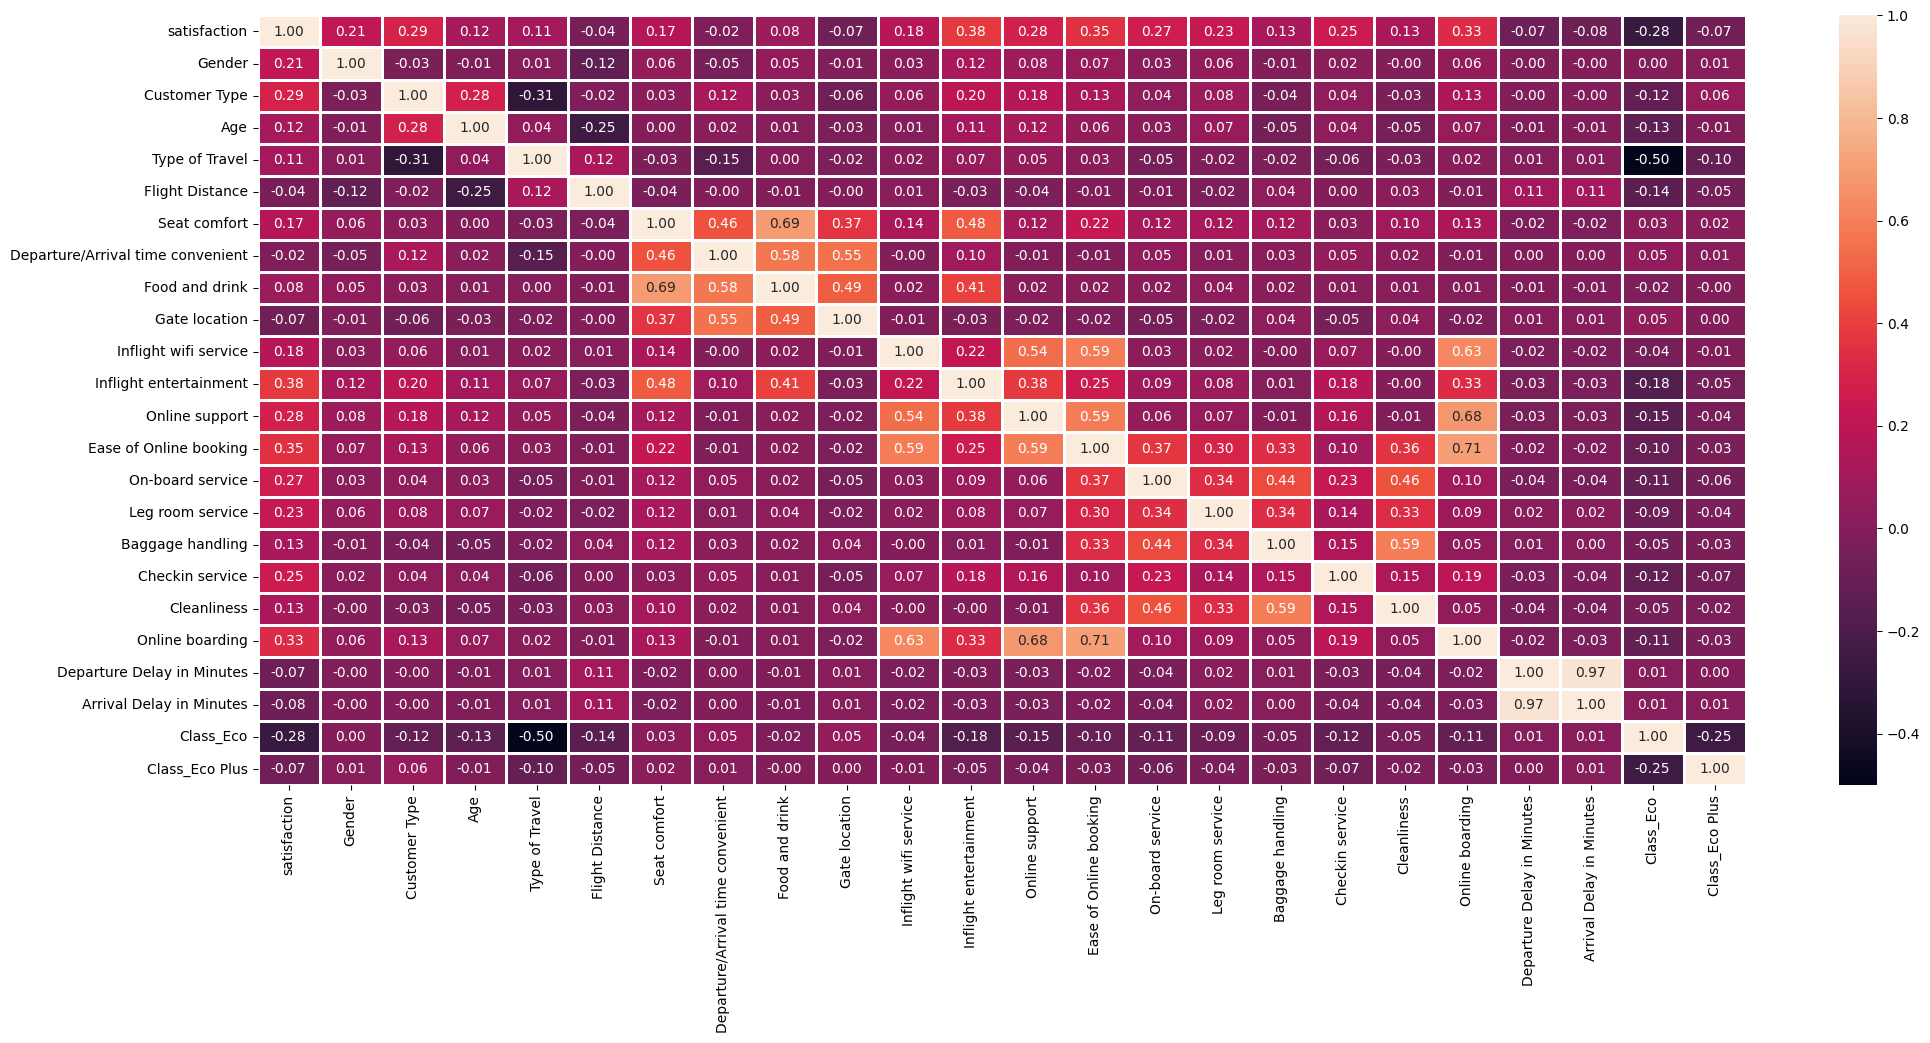

In [75]:
plt.figure(figsize=(24,10))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

Outliers

In [77]:
df1.shape

(129487, 24)

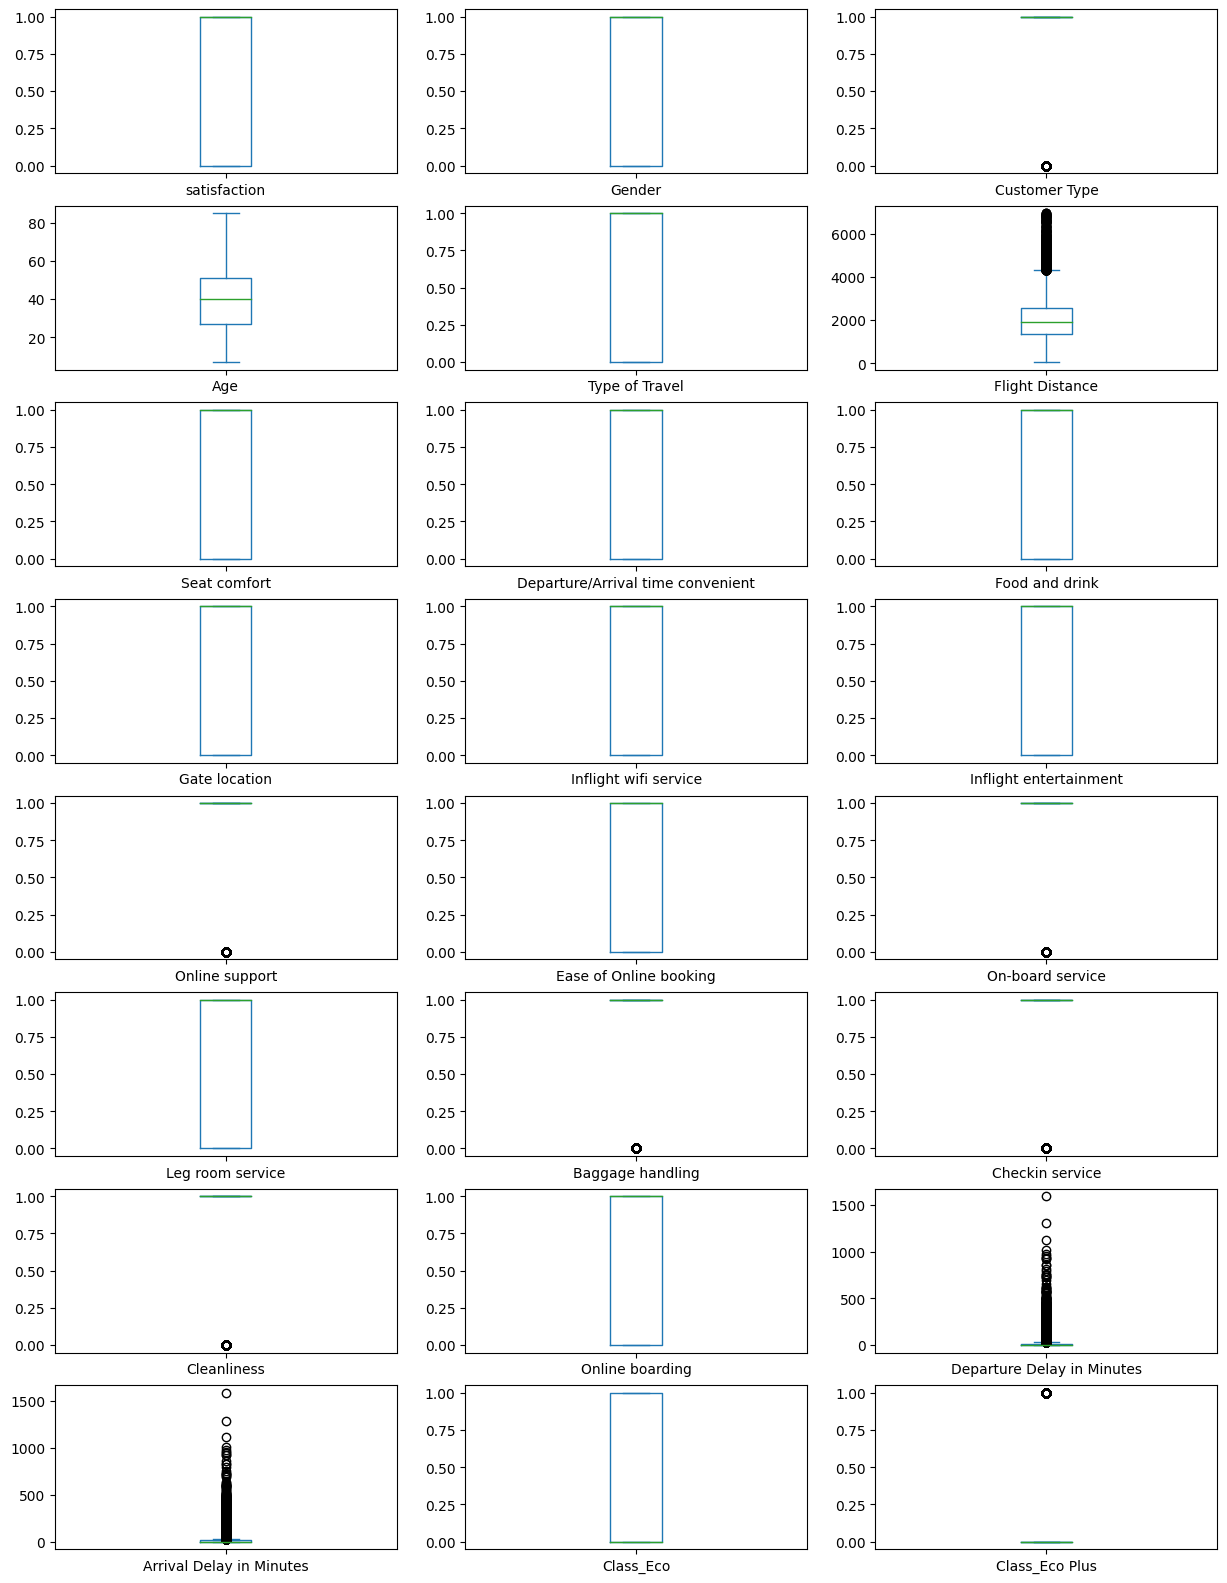

In [80]:
df1.plot(kind = "box",subplots = True,layout = (8,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [81]:
to_do_list = ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

In [82]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [83]:
df2 = treat_outliers_all(df1 , to_do_list)

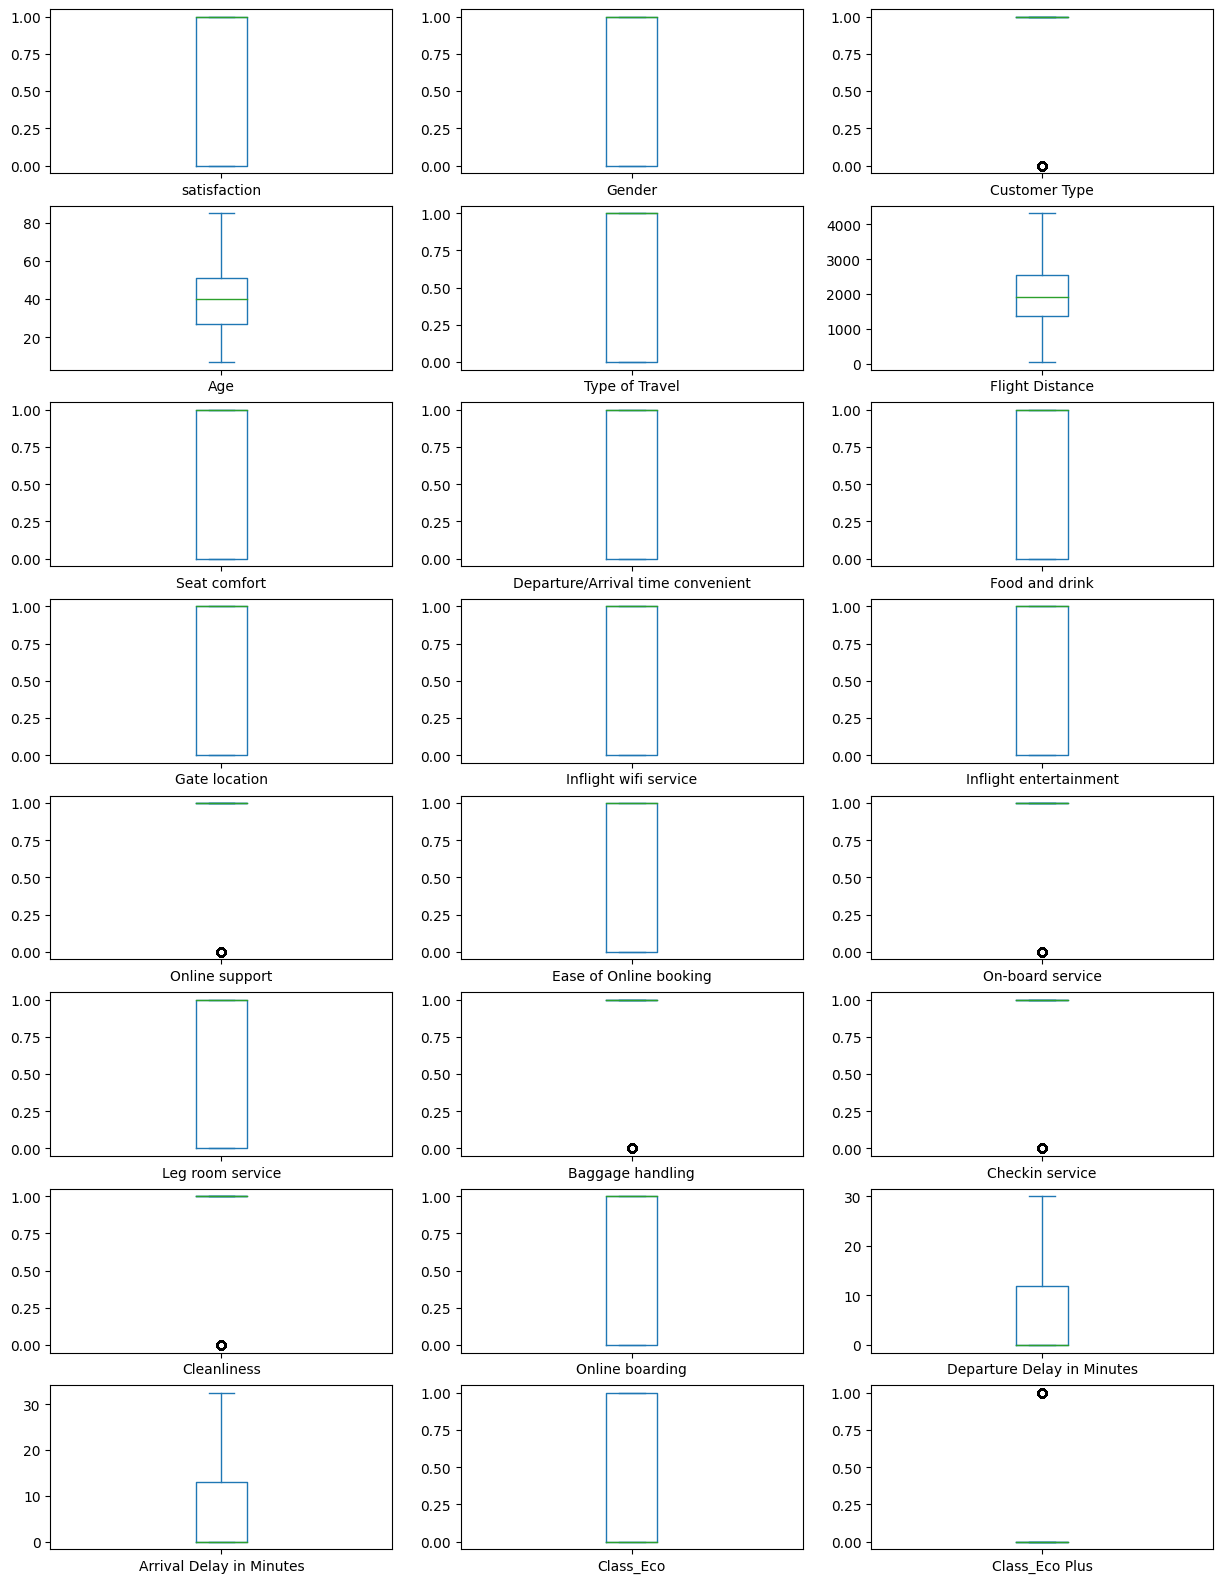

In [87]:
df2.plot(kind = "box",subplots = True,layout = (8,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

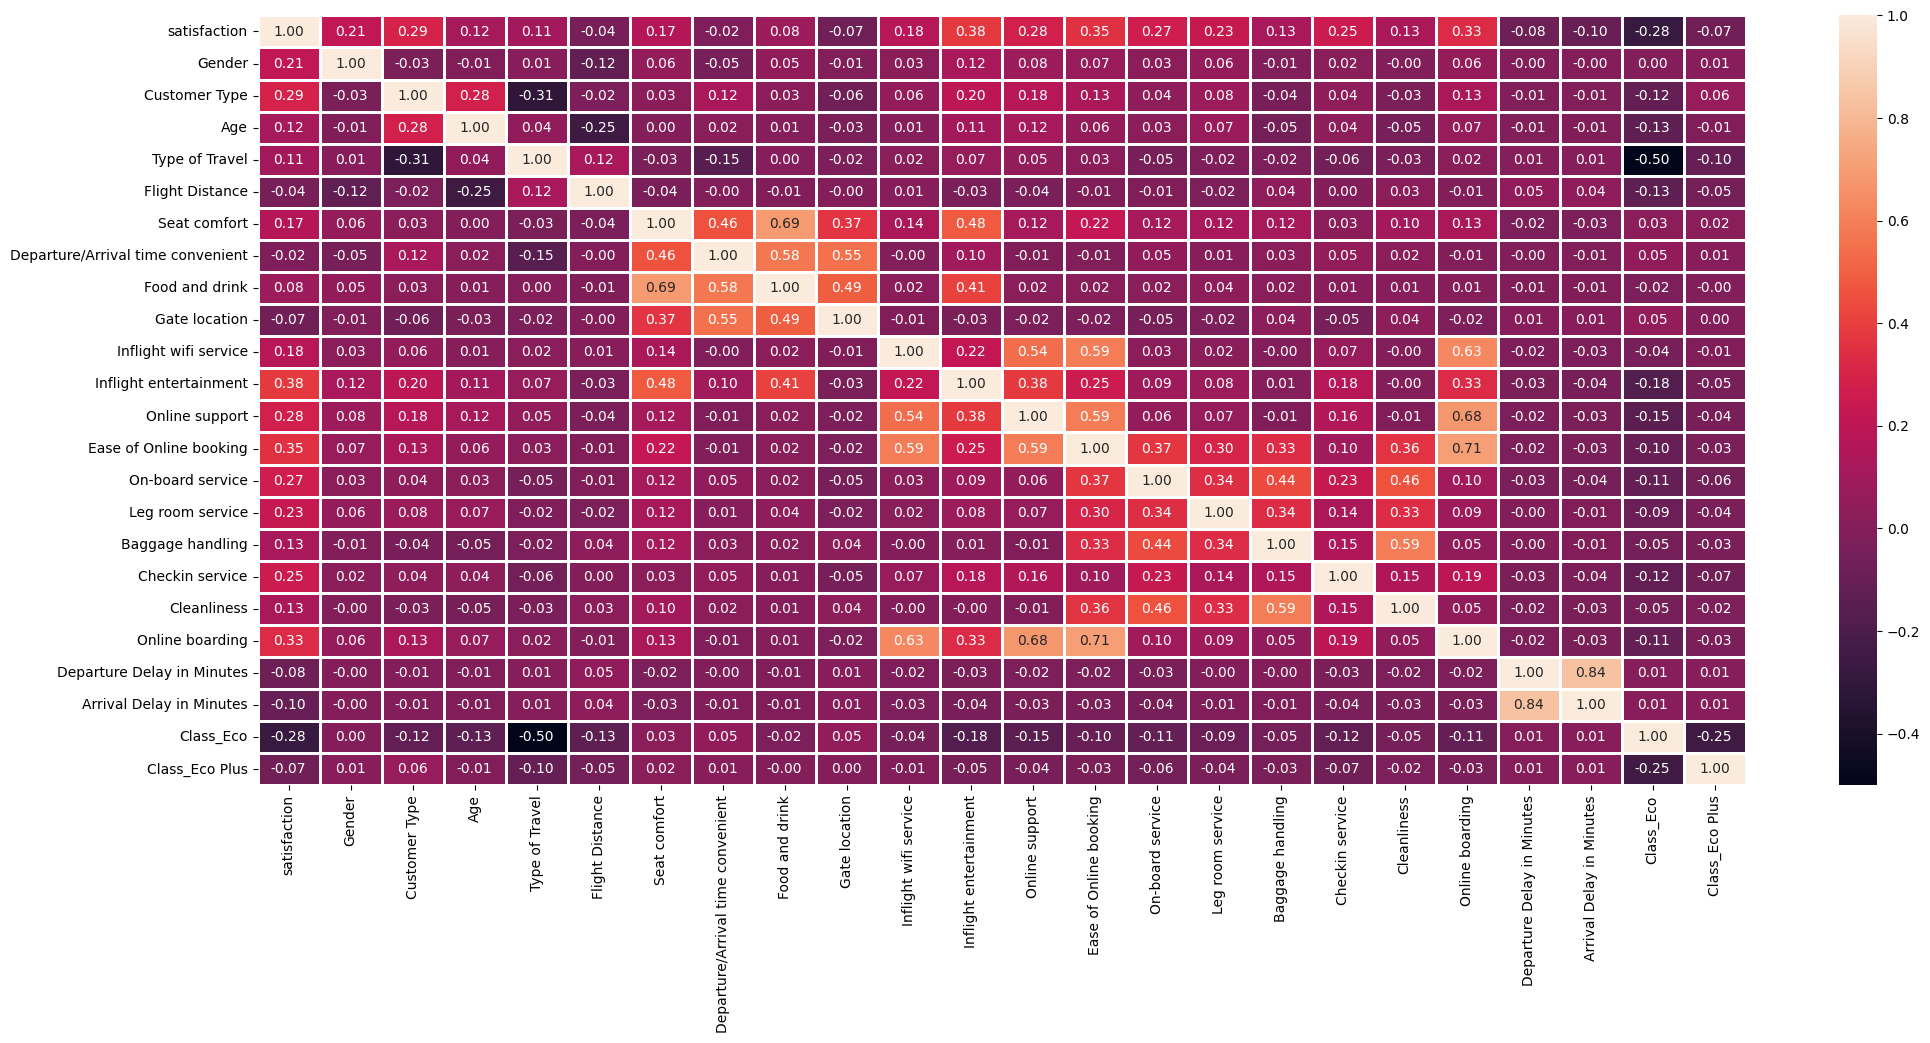

In [88]:
plt.figure(figsize=(24,10))
sns.heatmap(df2.corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

array([[<AxesSubplot: title={'center': 'satisfaction'}>,
        <AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'Customer Type'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Type of Travel'}>],
       [<AxesSubplot: title={'center': 'Flight Distance'}>,
        <AxesSubplot: title={'center': 'Seat comfort'}>,
        <AxesSubplot: title={'center': 'Departure/Arrival time convenient'}>,
        <AxesSubplot: title={'center': 'Food and drink'}>,
        <AxesSubplot: title={'center': 'Gate location'}>],
       [<AxesSubplot: title={'center': 'Inflight wifi service'}>,
        <AxesSubplot: title={'center': 'Inflight entertainment'}>,
        <AxesSubplot: title={'center': 'Online support'}>,
        <AxesSubplot: title={'center': 'Ease of Online booking'}>,
        <AxesSubplot: title={'center': 'On-board service'}>],
       [<AxesSubplot: title={'center': 'Leg room service'}>,
        <AxesSubplot: title={'c

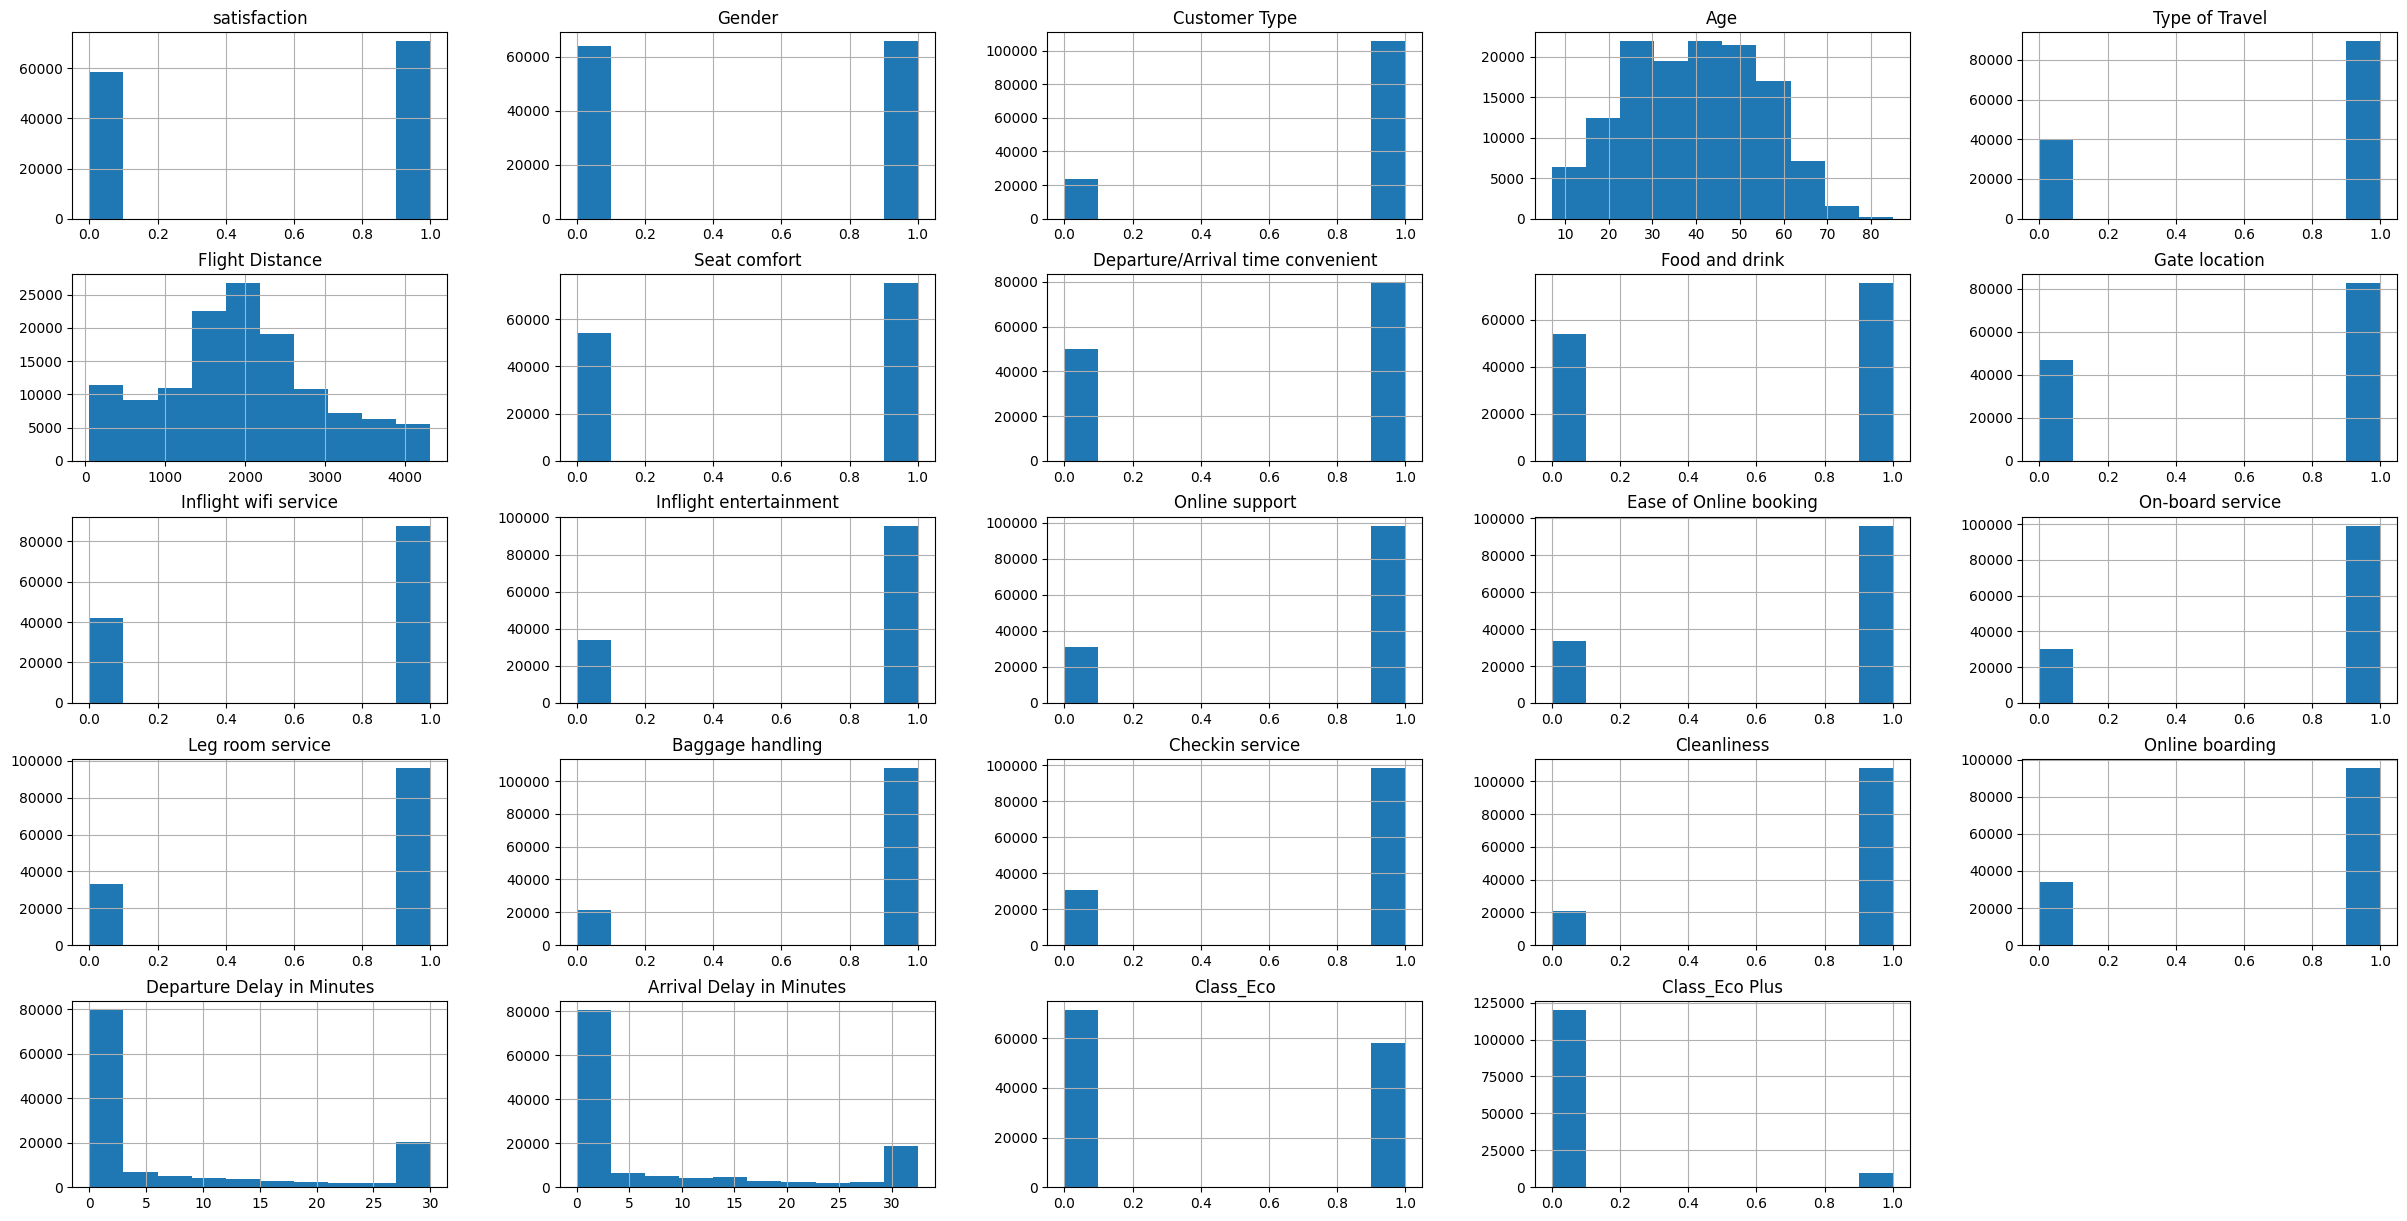

In [89]:
df2.hist(figsize=(30,15))

In [95]:
df2.describe()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Eco,Class_Eco Plus
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.547406,0.507410,0.816862,39.428761,0.690764,1969.343795,0.580591,0.612702,0.582908,0.637493,...,0.765652,0.743426,0.835165,0.762401,0.836957,0.738653,7.362608,7.933391,0.448825,0.072440
std,0.497749,0.499947,0.386781,15.117597,0.462180,994.360694,0.493464,0.487134,0.493080,0.480726,...,0.423592,0.436744,0.371033,0.425614,0.369407,0.439370,11.197398,11.981359,0.497376,0.259216
min,0.000000,0.000000,0.000000,7.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,27.000000,0.000000,1359.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,40.000000,1.000000,1924.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,51.000000,1.000000,2543.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,13.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,85.000000,1.000000,4319.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,32.500000,1.000000,1.000000


Feature Engineering

In [91]:
X = df2.drop('satisfaction',axis=1)
y = df2.satisfaction

X.shape, y.shape

((129487, 23), (129487,))

In [93]:
y.value_counts()

1    70882
0    58605
Name: satisfaction, dtype: int64

uneven, hence using stratify = y

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, 
                                                    random_state = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103589, 23), (25898, 23), (103589,), (25898,))

In [94]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

using logitic regression

In [96]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train_RF, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [100]:
print('Training set score: {:.4f}'.format(logreg.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test_RF, y_test)))

Training set score: 0.7897
Test set score: 0.7884


These two values are quite comparable. So, there is no question of overfitting.

Using gridsearch for maximum accuracy

In [108]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, {'solver':['liblinear','sag','saga']},
              {'C':[0.01,0.1,1, 10, 100, 1000]}]


logreg_1 = LogisticRegression(random_state=0)


grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           cv = 3,
                           verbose=10)


grid_search.fit(X_train_RF, y_train)
print("Best Parameters are:",grid_search.best_params_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV 1/3; 1/11] START penalty=l1.................................................
[CV 1/3; 1/11] END ..................penalty=l1;, score=0.786 total time=   0.9s
[CV 2/3; 1/11] START penalty=l1.................................................
[CV 2/3; 1/11] END ..................penalty=l1;, score=0.790 total time=   1.0s
[CV 3/3; 1/11] START penalty=l1.................................................
[CV 3/3; 1/11] END ..................penalty=l1;, score=0.792 total time=   0.9s
[CV 1/3; 2/11] START penalty=l2.................................................
[CV 1/3; 2/11] END ..................penalty=l2;, score=0.786 total time=   0.2s
[CV 2/3; 2/11] START penalty=l2.................................................
[CV 2/3; 2/11] END ..................penalty=l2;, score=0.790 total time=   0.2s
[CV 3/3; 2/11] START penalty=l2.................................................
[CV 3/3; 2/11] END ..................penalty=l2;

In [109]:
print('Training set score: {:.4f}'.format(grid_search.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(grid_search.score(X_test_RF, y_test)))

Training set score: 0.7897
Test set score: 0.7884


Using KNN

In [110]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=10,cv=3)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV 1/3; 1/19] START n_neighbors=1..............................................
[CV 1/3; 1/19] END ...............n_neighbors=1;, score=0.598 total time=   2.9s
[CV 2/3; 1/19] START n_neighbors=1..............................................
[CV 2/3; 1/19] END ...............n_neighbors=1;, score=0.601 total time=   2.7s
[CV 3/3; 1/19] START n_neighbors=1..............................................
[CV 3/3; 1/19] END ...............n_neighbors=1;, score=0.598 total time=   2.8s
[CV 1/3; 2/19] START n_neighbors=2..............................................
[CV 1/3; 2/19] END ...............n_neighbors=2;, score=0.584 total time=   2.8s
[CV 2/3; 2/19] START n_neighbors=2..............................................
[CV 2/3; 2/19] END ...............n_neighbors=2;, score=0.584 total time=   2.8s
[CV 3/3; 2/19] START n_neighbors=2..............................................
[CV 3/3; 2/19] END ...............n_neighbors=2;

In [112]:
print('Training set score: {:.4f}'.format(knn_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.score(X_test, y_test)))

Training set score: 0.6813
Test set score: 0.6234


Random Forests

In [119]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8651


In [122]:
print('Training set score: {:.4f}'.format(rfc.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test_RF, y_test)))

Training set score: 0.9897
Test set score: 0.8651


In [120]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8742


In [121]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 0.9998
Test set score: 0.8742


CNN

In [124]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [ ]:
d_model = Sequential()
d_model.add(Dense(60, input_shape = (17,), activation = "relu"))
d_model.add(Dense(120, activation = "relu"))
d_model.add(Dense(256, activation = "relu"))
d_model.add(Dropout(0.2))
d_model.add(Dense(1, activation = "sigmoid"))
d_model.compile(Adam(learning_rate = 0.01), "binary_crossentropy", metrics = ["accuracy"])
d_model.summary()

In [125]:
satisfaction_model = Sequential()
satisfaction_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
satisfaction_model.add(Dense(512, activation = "relu"))
satisfaction_model.add(Dense(1024, activation = "relu"))
satisfaction_model.add(Dropout(0.2))
satisfaction_model.add(Dense(1024, activation = "relu"))
satisfaction_model.add(Dense(512, activation = "relu"))
satisfaction_model.add(Dense(256, activation = "relu"))
satisfaction_model.add(Flatten())
satisfaction_model.add(Dense(512, activation = "relu"))
satisfaction_model.add(Dropout(0.5))
satisfaction_model.add(Dense(512, activation = "relu"))
satisfaction_model.add(Dropout(0.5))
# satisfaction_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
satisfaction_model.add(Dense(1, activation = "sigmoid"))
satisfaction_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               1

In [126]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
satisfaction_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [127]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [128]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='sat_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [129]:
history=satisfaction_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=128, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


642/648 [============================>.] - ETA: 0s - loss: 0.3498 - accuracy: 0.8473
Epoch 1: val_accuracy improved from -inf to 0.86794, saving model to sat_model.h5
648/648 [==============================] - 5s 4ms/step - loss: 0.3495 - accuracy: 0.8474 - val_loss: 0.3036 - val_accuracy: 0.8679
Epoch 2/100
634/648 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8657
Epoch 2: val_accuracy improved from 0.86794 to 0.87378, saving model to sat_model.h5
648/648 [==============================] - 2s 4ms/step - loss: 0.3090 - accuracy: 0.8657 - val_loss: 0.2948 - val_accuracy: 0.8738
Epoch 3/100
648/648 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.8695
Epoch 3: val_accuracy did not improve from 0.87378
648/648 [==============================] - 2s 4ms/step - loss: 0.2997 - accuracy: 0.8695 - val_loss: 0.3084 - val_accuracy: 0.8487
Epoch 4/100
637/648 [============================>.] - ETA: 0s - loss: 0.2941 - accuracy: 0.8708
Epoch 4: val_

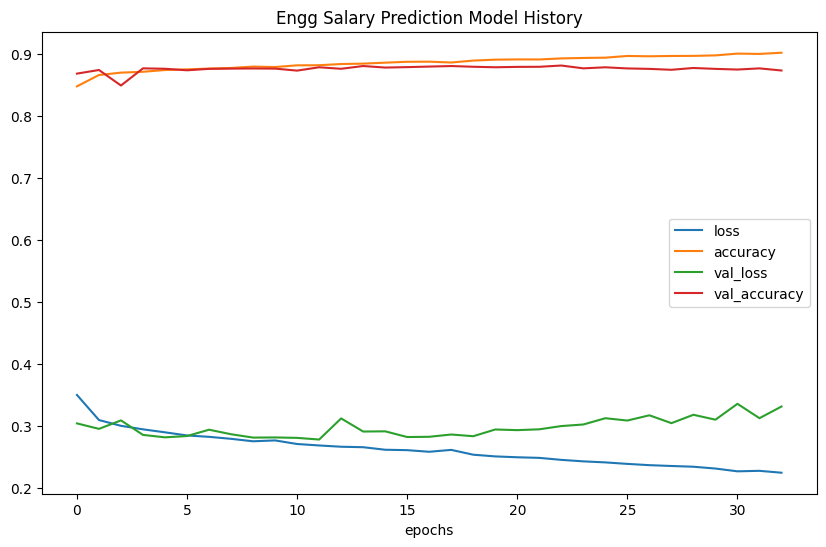

In [130]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [132]:
print("Evaluate satisfaction_model against trained data")
score = satisfaction_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (satisfaction_model.metrics_names[1], score[1]*100))

print("Evaluate satisfaction_model against test data")
score = satisfaction_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (satisfaction_model.metrics_names[1], score[1]*100))

Evaluate satisfaction_model against trained data
score accuracy: 89.47%
Evaluate satisfaction_model against test data
score accuracy: 87.79%


Best is CNN!